In [2]:
# #RANDOM SAMPLING FOR W SWEEP
# from scipy.stats import qmc
# import pandas as pd

# #No control sampling
# sampler = qmc.LatinHypercube(d=2)
# sample = sampler.random(n=500)
# l_bounds = [10E-7, 10E-7]
# u_bounds = [10E-3, 10E-3]
# sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
# nc_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':1., 'k_miox':sample_scaled[:,1], 'theta_miox':1.})
# nc_lhc.to_csv('exp_data/nc_lhc.csv')

# #Upstream repression sampling
# sampler = qmc.LatinHypercube(d=3)
# sample = sampler.random(n=500)
# l_bounds = [10E-7, 10E-7, 10E-7]
# u_bounds = [10E-3, 10, 10E-3]
# sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
# ur_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':sample_scaled[:,1], 'k_miox':sample_scaled[:,2], 'theta_miox':1.})
# ur_lhc.to_csv('exp_data/ur_lhc.csv')

# #Downstream activation sampling
# sampler = qmc.LatinHypercube(d=3)
# sample = sampler.random(n=500)
# l_bounds = [10E-7, 10E-7, 10E-7]
# u_bounds = [10E-3, 10E-3, 10]
# sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
# da_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':1., 'k_miox':sample_scaled[:,1], 'theta_miox':sample_scaled[:,2]})
# da_lhc.to_csv('exp_data/da_lhc.csv')

# #Dual control sampling
# sampler = qmc.LatinHypercube(d=4)
# sample = sampler.random(n=500)
# l_bounds = [10E-7, 10E-7, 10E-7, 10E-7]
# u_bounds = [10E-3, 10, 10E-3, 10]
# sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
# dc_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':sample_scaled[:,1], 'k_miox':sample_scaled[:,2], 'theta_miox':sample_scaled[:,3]})
# dc_lhc.to_csv('exp_data/dc_lhc.csv')

In [57]:
###PYTHON NOTEBOOK FOR VISUALIZATION OF FIGURES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import linregress
import colormaps as cmaps

### Medium conditions

In [55]:
#Read in GC data
growth_conditions_names = ["galactose", "gluconate", "xylose", "lalanine", "lactate", "pyruvate", "ribose", "glucose", "fructose", "sorbitol", "mannitol", "na-glucosamine", "glycerol", "succinate", "acetate"]

wt = pd.DataFrame()
for g in growth_conditions_names:
    ode_data = pd.read_csv("F:/medium_conditions/"+g+"_ode_data.csv")
    fba_data = pd.read_csv("F:/medium_conditions/"+g+"_fba_data.csv")
    wt = pd.concat([wt, pd.DataFrame({"gc": [g], "p_auc": [np.sum(ode_data.mi)], "p_final": [list(ode_data.mi)[-1]], "lam_final": [list(fba_data.lam)[-1]]})])  


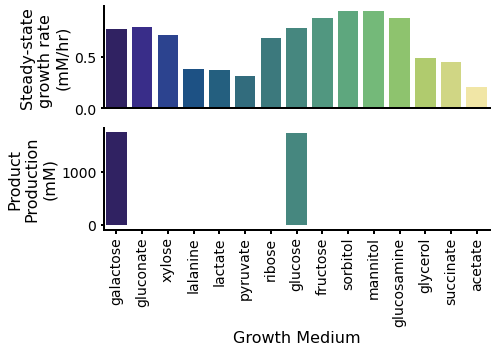

In [73]:
###FIGURE: Growth conditions experiment
gcn = ["galactose", "gluconate", "xylose", "lalanine", "lactate", "pyruvate", "ribose", "glucose", "fructose", "sorbitol", "mannitol", "glucosamine", "glycerol", "succinate", "acetate"]

palette = cmaps.haline.discrete(15).colors
linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12

fig, axs = plt.subplots(2, 1,figsize=(7, 5), sharex=True)

#Growth rates
ax = axs[0]
sns.barplot(data=wt, x='gc', y='lam_final', palette=palette, ax=ax)
ax.set_ylabel('Steady-state\ngrowth rate \n(mM/hr)', fontsize=axislabelsize)
ax.set_xlabel('')
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.set_xlabel('')
ax.tick_params(axis='x', bottom=False)

#Product production
ax = axs[1]
sns.barplot(data=wt, x='gc', y='p_auc', palette=palette, ax=ax)
ax.set_ylabel('Product\nProduction\n(mM)', fontsize=axislabelsize)
ax.set_xlabel('Growth Medium', fontsize=16)
ax.set_xticklabels(gcn, fontsize=12, rotation=90)

for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
fig.tight_layout()
#fig.savefig('../figs/bar_wt.png', dpi=500)

### Burden results

In [82]:
#BURDEN COMPUTATION -FIX MEEEEEE
# print("DC")
# burdens1 = []
# burdens2 = []
# for w in fba_data_dc_final.W.unique():
#     fba_data = fba_data_dc_final.loc[fba_data_dc_final.W == w].reset_index(drop=True)
#     burden1 = sum(fba_data.lam[0] - fba_data.lam)
#     burden2 = fba_data.lam[0] - fba_data.lam[len(fba_data)-1]
#     burdens1.append(burden1)
#     burdens2.append(burden2)

# sum_data_dc_final['sum_burden'] = burdens1
# sum_data_dc_final['delta_burden'] = burdens2

# sum_data_dc_final.to_csv('exp_data/combined_data/sum_data_dc_burden_final.csv')

print("NC")
burdens1 = []
burdens2 = []
for w in fba_data_nc_final.W.unique():
    fba_data = fba_data_nc_final.loc[fba_data_nc_final.W == w].reset_index(drop=True)
    burden1 = sum(fba_data.lam[0] - fba_data.lam)
    burden2 = fba_data.lam[0] - fba_data.lam[len(fba_data)-1]
    burdens1.append(burden1)
    burdens2.append(burden2)

sum_data_nc_final['sum_burden'] = burdens1
sum_data_nc_final['delta_burden'] = burdens2

sum_data_nc_final.to_csv('exp_data/combined_data/sum_data_nc_burden_final.csv')

print("DA")
burdens1 = []
burdens2 = []
for w in fba_data_da_final.W.unique():
    fba_data = fba_data_da_final.loc[fba_data_da_final.W == w].reset_index(drop=True)
    burden1 = sum(fba_data.lam[0] - fba_data.lam)
    burden2 = fba_data.lam[0] - fba_data.lam[len(fba_data)-1]
    burdens1.append(burden1)
    burdens2.append(burden2)

sum_data_da_final['sum_burden'] = burdens1
sum_data_da_final['delta_burden'] = burdens2

sum_data_da_final.to_csv('exp_data/combined_data/sum_data_da_burden_final.csv')

print('UR')
burdens1 = []
burdens2 = []
for w in fba_data_ur_new.W.unique():
    fba_data = fba_data_ur_new.loc[fba_data_ur_new.W == w].reset_index(drop=True)
    burden1 = sum(fba_data.lam[0] - fba_data.lam)
    burden2 = fba_data.lam[0] - fba_data.lam[len(fba_data)-1]
    burdens1.append(burden1)
    burdens2.append(burden2)

sum_data_ur_new['sum_burden'] = burdens1
sum_data_ur_new['delta_burden'] = burdens2

sum_data_ur_new.to_csv('exp_data/combined_data/sum_data_ur_burden_final.csv')


DC
NC
DA
UR


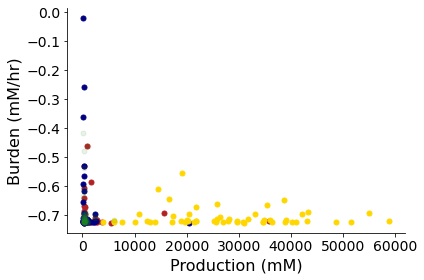

In [83]:
###FIGURE: Burden vs. production
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

ax.plot(sum_data_nc.ga_tot, -sum_data_nc.delta_burden, '.', c='firebrick', ms=10)
ax.plot(sum_data_dc.ga_tot, -sum_data_dc.delta_burden, '.', c='navy', ms=10)
ax.plot(sum_data_da.ga_tot, -sum_data_da.delta_burden, '.', c='gold', ms=10)
ax.plot(sum_data_ur.ga_tot, -sum_data_ur.delta_burden, '.', c='forestgreen', ms=10, alpha=0.1)
#ax.set_xlim([0, 3000])
fig.tight_layout()


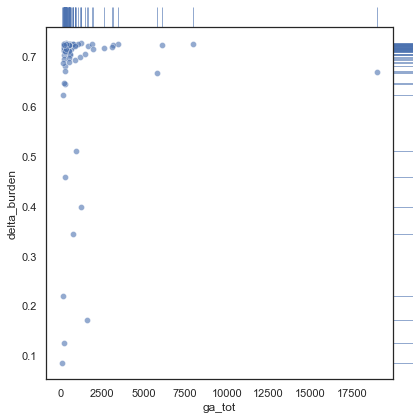

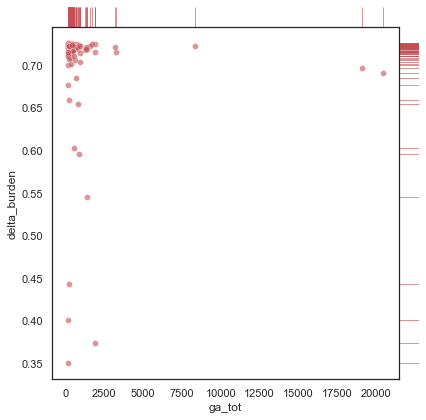

In [30]:
import seaborn as sns

g = sns.JointGrid(data=sum_data_dc, x="ga_tot", y="delta_burden", space=0, ratio=17)
g.plot_joint(sns.scatterplot,
             color="b", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="b", alpha=.6)

g = sns.JointGrid(data=sum_data_nc, x="ga_tot", y="delta_burden", space=0, ratio=17)
g.plot_joint(sns.scatterplot,
             color="r", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="r", alpha=.6)

### BayesOpt Experiments

In [87]:
bo_data = pd.read_csv('F:/bayesopt/bayesopt_test/bo_data_bayesopt_test.csv').reset_index()

best_loss = 1E5
best_circuit = 'Initial'
best_losses = []
best_losses_circuits = []
for i in range(len(bo_data)):
    if bo_data.objective[i] < best_loss:
        best_loss = bo_data.objective[i]
        best_circuit = bo_data.arch[i]
    best_losses.append(best_loss)
    best_losses_circuits.append(best_circuit)
bo_data['best_losses'] = best_losses
bo_data['best_loss_circuit'] = best_losses_circuits


c:\Users\Charlotte\anaconda3\envs\sundials\lib\site-packages\seaborn\_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


<Figure size 1008x607.68 with 0 Axes>

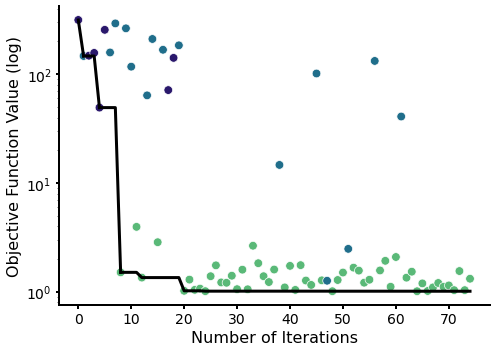

In [96]:

fig = plt.figure(figsize=(7*2, 4.22*2))
palette = cmaps.haline.discrete(4).colors
linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12

fig, ax = plt.subplots(1, 1, figsize=(7, 5), sharex=True)

ax.set_xlabel('Number of Iterations', fontsize=axislabelsize)
ax.set_ylabel('Objective Function Value (log)', fontsize=axislabelsize)
ax.set_yscale('log')
#ax.set_ylim([10E-2, 10E8])
sns.scatterplot(x='index', y='objective', hue='arch', data=bo_data, ax=ax, palette=palette, legend=False, s=75)

prev_c = 'Initial'
starts = []
archs = [prev_c]
for i in range(len(bo_data)):
    c = bo_data.best_loss_circuit[i]
    if c != prev_c: 
        starts.append(i)
        archs.append(c)
        prev_c = c
starts
stops = starts[1:]
stops.append(len(bo_data))

for start, stop, a in zip(starts, stops, archs[1:]):
    ax.plot(bo_data.index[start:stop+1], bo_data.best_losses[start:stop+1], color='k', linewidth=3)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(width=2)

for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)

fig.tight_layout()
#if save_figs: fig.savefig('../figs/glucaric_acid_sample_run.png', dpi=300)